<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Singapore Housing Data and Kaggle Challenge <br> [Part 1 of 2]

_Prepared by: Timothy Chan, 3 Mar 2023_

## Contents:
- [Background](#Background)
- [Data Import and Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Cleaning Round Two](#Data-Cleaning-Round-Two)
- [Summary](#Summary-for-Part-1)

--- 
## Background
---

### Problem Statement

Resale flat transactions are substantial: they accounted for [60.5% of all sale transactions in 3rd Quarter 2022](https://www.ura.gov.sg/Corporate/Media-Room/Media-Releases/pr22-38).

A real estate agent company in Singapore would like to know how to advise clients on the appropriate prices to list their flats for resale. They require a reproducable model to predict Housing & Development Board (HDB) resale prices based on available information about the flat, as well as to understand the key factors affecting pricing of resale flats.

**Approach** <br>
We will perform Exploratory Data Analysis to understand features given in the dataset. 

Subsequently, we will use basic regression model (Linear Regression) to model and validate using the training set, and predict on the test set. 

Performance will be evaluated using *root mean squared error (RMSE)*, while considering the number of features. Ideally we would like to keep within 30 features, as more features means more complexity.

**Part 1** of the project, primarily Data Cleaning and Exploratory Data Analysis (EDA). For detailed Modelling and Recommendations, please refer to **Part 2**.

**Prior research on key factors affecting resale prices**

Based on [PropertyGuru](https://www.propertyguru.com.sg/property-guides/hdb-valuation-sales-12882), an real estate online platform, the top three factors are:
- Location (convenience of amenities such as MRT stations, shopping malls, and schools; maturity of estate; proximity to CBD) 
- Flat condition (may or may not be related to age of HDB as there could be renovation done)
- Size of the flat and type of the flat (rare types may be higher in demand)

Furthermore the remaining lease of the HDB may affect the [valuation](https://www.teoalida.com/singapore/lease/). The longer the HDB lease age, or the shorter the remaining lease, the more the flat value may depreciate.

We will explore the data with this as our expectation of key factors.

### Data Dictionary

Datasets provided: 
* [`train.csv`](./datasets/train.csv): Training data for modelling. Resale flat transactions between Mar 2012 and Apr 2021.
* [`test.csv`](./dataset/test.csv): Test data for the model. Resale flat transactions between Mar 2012 and Apr 2021. Target variable (resale_price) is removed. 

Data dictionary of cleaned training and testing files before performing one-hot encoding. For data dictionary of raw data, please refer to [Kaggle](https://www.kaggle.com/competitions/dsi-sg-project-2-regression-challenge-hdb-price/data).

|Features|Type|Dataset|Description|
|:---|:---|:---|:---|
|id|float|flats_test_cleaned.csv||
|resale_price|float|flats_cleaned.csv|Property's sale price in Singapore dollars. Our target variable to predict|
|floor_area_sqft|float|both|Floor area of the resale flat unit in square feet|
|price_per_sqft|float|both|Price in Singapore dollars for each square feet of floor area. Not to use for model|
|street_name|string|both|Street name where the resale flat resides. For reference only|
|address|string|both|Address where the resale flat resides. For reference only|
|latitude|float|both|Latitude based on postal code. For reference only|
|longitude|float|both|Longtitude based on postal code. For reference only|
|flat_type|string|both|Type of the resale flat unit, e.g. 3 ROOM|
|flat_model|string|both|HDB model of the resale flat, e.g. Multi Generation|
|planning_area|string|both|Government planning area that the flat is located|
|postal_sector|integer|both|first two digits of six digit postal code|
|max_floor_lvl|integer|both|Highest floor of the resale flat|
|mid_storey|integer|both|Estimated floor level of unit based on median value of storey range|
|hdb_age|integer|both|Number of years from lease commencement date to year of data (2021)|
|mrt_interchange|integer|both|boolean value if the nearest MRT station is also a train interchange|
|bus_interchange|integer|both|boolean value if the nearest MRT station is a bus interchange station|
|mrt_nearest_distance|float|both|distance in metres to the nearest MRT station|
|hawker_nearest_distance|float|both|distance in metres to the nearest hawker centre|
|distance_to_cityhall|float|both|distance in metres to the CBD|
|hawker_within_2km_imp|float|both|number of hawker centres within 2 kilometres (missing values imputed)|
|mall_within_2km_imp|float|both|number of malls within 2 kilometres (missing values imputed)|
|total_dwelling_units|integer|both|total number of residential dwelling units in the resale flat|
|commercial|integer|both|if resale flat has commercial units in the same block|
|flat_type_tgt|float|both|target encoding of mean price per sqft of each category of flat type|
|flat_model_tgt|float|both|target encoding of mean price per sqft of each category of flat model|
|planning_area_tgt|float|both|target encoding of mean price per sqft of each category of planning area|
|postal_sector_tgt|float|both|target encoding of mean price per sqft of each category of postal sector|

--- 
## Data Import and Cleaning
---

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Import data
flats = pd.read_csv("datasets/train.csv")
flats_test = pd.read_csv("datasets/test.csv")

C:\Users\chanh\AppData\Local\Temp\ipykernel_13184\4180761790.py:2: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  flats = pd.read_csv("datasets/train.csv")
C:\Users\chanh\AppData\Local\Temp\ipykernel_13184\4180761790.py:3: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  flats_test = pd.read_csv("datasets/test.csv")


In [32]:
# Look at first 5 rows of data
flats.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  ...  vacancy  \
0     10 TO 12            90.0     Model A                 2006  ...       78   
1     07 TO 09           130.0    Improved                 1987  ...       45   
2     13 TO 15           144.0   Apartment                 1997  ...       39   
3     01 TO 05           103.0     Model A                 1992  ...       20   
4     01 TO 03            83.0  Simplified                 1987  ...       74   

   pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0                    1          1.317659         103.882504   
1                    1          1.349783         103.854529   
2                    0          1.345245         103.756265   
3                    1          1.354789         103.844934   
4                    0          1.416280         103.838798   

   sec_sch_nearest_dist                             sec_sch_name  \
0           1138.633422                 Geylang Methodist School   
1            447.894399  Kuo Chuan Presbyterian Secondary School   
2            180.074558             Yusof Ishak Secondary School   
3            389.515528                     Catholic High School   
4            312.025435             Orchid Park Secondary School   

   cutoff_point affiliation sec_sch_latitude  sec_sch_longitude  
0           224           0         1.317659         103.882504  
1           232           0         1.350110         103.854892  
2           188           0         1.342334         103.760013  
3           253           1         1.354789         103.844934  
4           208           0         1.414888         103.838335  

[5 rows x 78 columns]

In [33]:
# View description of dataset
flats.info()

# Noted 'postal' is an object instead of integer. Will perform data cleaning.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

---
Postal:
1. Identify first 2 digits of 6 digits postal as postal_sector (https://www.ura.gov.sg/realEstateIIWeb/resources/misc/list_of_postal_districts.htm)
2. For those with NIL, noted that they are in Choa Chu Kang or Sengkang towns. Replaced values to match theirs.

In [34]:
flats["postal"].astype(str).sort_values(ascending=False)

75494        NIL
66613        NIL
76787        NIL
76656        NIL
62338        NIL
           ...  
35953     100044
131750    100044
22060     100044
126359    100044
141264    100044
Name: postal, Length: 150634, dtype: object

In [35]:
# Check what is causing postal to be a string instead of integer datatype.

non_numerical_values = []

for val in flats['postal']:
    try:
        float(val)
    except ValueError:
        if val not in non_numerical_values:
            non_numerical_values.append(val) # if value is non-numerical and not already identified, it will be added to list

if len(non_numerical_values) > 0:
    print(f'Non-numerical value: {non_numerical_values}')
else:
    print(f'No non-numerical values in {col}')

Non-numerical value: ['NIL']


In [36]:
flats['postal'].replace('NIL',999999,inplace=True) # temporarily replace NIL with 99999
flats['postal_sector'] = flats['postal'].apply(lambda x: int(str(x)[-6:-4])) # take only first 1st 2 of 6 digit postal (or 1st of 5 digit)
flats['postal_sector']

0         38
1         57
2         65
3         57
4         76
          ..
150629    73
150630    64
150631    41
150632    27
150633    76
Name: postal_sector, Length: 150634, dtype: int64

In [37]:
flats[flats['postal_sector']==99].groupby('town').size()

# Noted only Choa Chu Kang and Sengkang towns are affected

town
CHOA CHU KANG     6
SENGKANG         27
dtype: int64

In [38]:
flats[flats['town'] == 'CHOA CHU KANG'].groupby('postal_sector').size()

# Will assume affected for Choa Chu Kang should be postal sector 68

postal_sector
68    6337
99       6
dtype: int64

In [39]:
flats[flats['town'] == 'SENGKANG'].groupby('postal_sector').size()

# Will assume affected for Sengkang should be postal sector 54

postal_sector
54    8445
79    2597
99      27
dtype: int64

In [40]:
# replaced all postal_sector 99 for Choa Chu Kang and Sengkang
flats.loc[(flats['town'] == 'CHOA CHU KANG') & (flats['postal_sector'] == 99), 'postal_sector'] = 68
flats.loc[(flats['town'] == 'SENGKANG') & (flats['postal_sector'] == 99), 'postal_sector'] = 54

In [41]:
flats[flats['town'] == 'CHOA CHU KANG'].groupby('postal_sector').size() # Checked replaced with no issues

postal_sector
68    6343
dtype: int64

In [42]:
flats[flats['town'] == 'SENGKANG'].groupby('postal_sector').size() # Checked replaced with no issues

postal_sector
54    8472
79    2597
dtype: int64

In [43]:
flats['postal_sector'] = flats['postal_sector'].astype(str).apply(lambda x: x.zfill(2))

---

In [44]:
# Lowercase for column headers for consistency
flats.columns = flats.columns.str.lower()

In [45]:
# How many unique items there are to compare
flats.nunique().sort_values()

# Noted that there is only one unique category for 'residential', so this column is not helpful for the model
# Noted that all 'id' shows unique values for each row, so this column is not helpful for the model

residential                      1
affiliation                      2
precinct_pavilion                2
multistorey_carpark              2
pri_sch_affiliation              2
                             ...  
pri_sch_nearest_distance      9126
address                       9157
postal                       17483
price_per_sqft               24966
id                          150634
Length: 79, dtype: int64

In [46]:
# Identify columns with null values
flats.isnull().sum().sort_values(ascending=False).head(10)

# Observed null values for hawker and mall info. To perform data cleanining

hawker_within_500m       97390
mall_within_500m         92789
hawker_within_1km        60868
hawker_within_2km        29202
mall_within_1km          25426
mall_within_2km           1940
mall_nearest_distance      829
mrt_name                     0
mrt_nearest_distance         0
hawker_market_stalls         0
dtype: int64

In [47]:
# Impute missing values
# Chose Mall within 2km it has less missing values compared to other similar features; 
# Using simple mean because not many missing values
mean_mall_within_2km = np.mean(flats['mall_within_2km'])
flats['mall_within_2km_imp'] = flats['mall_within_2km'].fillna(mean_mall_within_2km)

In [48]:
# Impute missing values
# Chose  within 2km it has less missing values compared to other similar features;
# Using KNN because it has more missing values
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputer.fit(flats[['longitude', 'latitude', 'hawker_within_2km']]) # fit imputer to training data

# Transform training data
flats['hawker_within_2km_imp'] = imputer.transform(flats[['longitude', 'latitude', 'hawker_within_2km']])[:, -1]

In [49]:
first_list_to_drop = [
    'residential', # only 1 value, no comparison
    'id', # 1 value per row, no comparison
    'mrt_latitude', 'bus_stop_latitude', 'pri_sch_latitude', 'sec_sch_latitude', # difficult to model using linear regression / ridge / lasso
    'mrt_longitude', 'bus_stop_longitude', 'pri_sch_longitude', 'sec_sch_longitude', # difficult to model using linear regression / ridge / lasso
    'block', 'bus_stop_name', 'hawker_food_stalls', 'hawker_market_stalls', # not meaningful
    'storey_range', 'lower', 'upper', 'mid', # has similar column, mid_storey
    'floor_area_sqm', # has similar column, floor_area_sqft
    'full_flat_type', # covered in flat_type and flat_model
    '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', # confusing and complex. to use flat_type and flat_model instead
    'year_completed' # will look at lease_commence_date / hdb_age instead
    ]

flats.drop(first_list_to_drop, axis=1, inplace=True)

In [50]:
from haversine import haversine

# Calculate geodistance to cityhall

city_hall = (1.2931576, 103.852073)
flats['house_coord'] = tuple(zip(flats.latitude, flats.longitude))
flats['distance_to_cityhall'] = flats['house_coord'].map(lambda hse: haversine(hse, city_hall, unit='m'))

**Initial observations**
1. There are many columns. Based on the study of the column names and data dictionary provided on [Kaggle](https://www.kaggle.com/competitions/dsi-sg-project-2-regression-challenge-hdb-price/data), some may be repetitive and some may be irrelevant (logically does not affect HDB resale prices). To remove those columns and narrow down the columns to explore.

2. Noted some columns may require data cleaning for missing or wrong data types. Will perform later if these are columns worth exploring.

3. Target would be the *'resale_price'*.

4. Some columns to bring attention to initially: 'floor_area_sqm' / 'floor_area_sqft', and 'price_per_sqft'. Theoretically, <br>
        resale price = (area in square feet) x (price per square feet)
and 'price_per_sqft' would be a value derived from 'resale_price' (a known value) and 'floor_area_sqft' (our target value). There would be data leakage and the model will fit 100% or close to 100% if we were to use 'price_per_sqft'. Thus for this project, we will not use this feature.

5. However this might give some clues that theoretically HDB resale prices should be affected by two main factors: (1) area and (2) price per unit area. Area can be fully covered by 'floor_area_sqm'. Initial intuition is that we might just need to isolate and find features relating to *price per unit area*. <br>
Based on prior research as well as study of data dictionary, the features affecting price per unit area could be related to:
    - location (e.g. geographical)
    - convenience (e.g. school)
    - remaining lease (hdb age)
    - flat condition (not in dataset, thus can expect the portion of flat condition not associated with hdb age to be part of the *irreducible error*)

--- 
## Exploratory Data Analysis
---

For EDA, we will examine the correlation of numberical features with Resale Price as well as it's two main factors (1) 'floor_area_sqft' and (2) 'price_per_sqft'. We will then select those features which show reasonable correlation and compare its correlation to other selected features.

We will also use scatterplots (for selected numerical features) or boxplots (for categorical features or if scatterplot is not clear) to explore the relationship of these features with price and area.

We would have selected ideal features if:
- there is high correlation and clear linear relationship between these features and price per unit area
- there is no correlation and no linear relationship between these features and floor area (to isolate these features as being price related only)
- there is weak correlation between these features and other selected features (to avoid overfitting)

In [51]:
flats['resale_price'].mean()

449161.5012130725

**Numerical features**

In [52]:
# Correlation of 'resale_price', 'floor_area_sqft', 'price_per_sqft', filter to exclude those with low correlation
corr_resale_price = round(flats.corr()['resale_price'], 2)
filtered_corr_resale_price = corr_resale_price[(corr_resale_price >= 0.2) | (corr_resale_price <= -0.2)].sort_values(ascending=False)

corr_area = round(flats.corr()['floor_area_sqft'], 2)
filtered_corr_area = corr_area[(corr_area >= 0.2) | (corr_area <= -0.2)].sort_values(ascending=False)

corr_price_unit_area = round(flats.corr()['price_per_sqft'], 2)
filtered_corr_price_unit_area = corr_price_unit_area[(corr_price_unit_area >= 0.2) | (corr_price_unit_area <= -0.2)].sort_values(ascending=False)

# Join into table
corr_comb = pd.concat([filtered_corr_resale_price, filtered_corr_area, filtered_corr_price_unit_area], axis=1)
corr_comb.replace(np.nan, 'low corr', inplace=True)
corr_comb

resale_price floor_area_sqft price_per_sqft
resale_price                     1.0            0.65           0.61
floor_area_sqft                 0.65             1.0       low corr
price_per_sqft                  0.61        low corr            1.0
max_floor_lvl                    0.5        low corr           0.58
lease_commence_date             0.35            0.28       low corr
mid_storey                      0.35        low corr           0.44
latitude                       -0.22            0.21          -0.51
distance_to_cityhall           -0.25            0.28          -0.61
hdb_age                        -0.35           -0.28       low corr
hawker_nearest_distance     low corr            0.21          -0.23
hawker_within_1km           low corr           -0.28           0.46
hawker_within_2km           low corr            -0.3           0.56
hawker_within_2km_imp       low corr            -0.3           0.55
total_dwelling_units        low corr           -0.43           0.27
mall_within_2km             low corr        low corr           0.25
hawker_within_500m          low corr        low corr           0.25
mall_within_2km_imp         low corr        low corr           0.24
sec_sch_nearest_dist        low corr        low corr            0.2
mrt_nearest_distance        low corr        low corr          -0.23

Ran the *Pearson Correlation* between all numerical features with 'resale_price' and it's two factors: (1) 'floor_area_sqft' and (2) 'price_per_sqft'. This is so we can better isolate what could be possible drivers for *price per unit area* and avoid overlapping of features in case it would already be covered under 'floor_area_sqft' (area). We narrowed down to those with higher than 15% correlation only.

1. As expected, floor_area_sqft and price_per_sqft had high correlation with *resale price*. Besides these
    - height of flat ('max_floor_lvl') and estimated floor level ('mid_storey') have high correlation. It also makes sense that these are also correlated to *price per unit area* but not *area*.
    - 'lease_commencement_date' and 'hdb_age'. These two are correlated to *resale price* by the same magnitude but in opposite directions. This makes sense because HDB has limited lease of 99 years, so the value should decrease as the lease ages. Interestingly, they are also correlated to *area* by the same magnitude in opposite directions. This means that as lease commencement date increases (or flat is newer), the flat area is bigger.

2. MRT, hawkers, malls convenience show some negative correlation for price per unit area but not resale price, we can consider exploring these. For hawkers, to use Hawker_Within_2km (highest correlation and least missing) and drop similar features Hawker_Within_500m and Hawker_Within_1km.
Distance to city hall show negative correlation to price per unit area and resale price as well.

3. Total dwelling units show some correlation for price per unit area but not resale price, we can consider exploring this further.

4. Secondary school convenience ('sec_sch_nearest_dist') correlation does not make sense as	price per unit area should decrease with distance of school, not the other way. We'll drop this feature

In [53]:
selected_num_features = flats[['resale_price','floor_area_sqft','price_per_sqft',
                               'max_floor_lvl','mid_storey',
                               'lease_commence_date', 'hdb_age',
                               'mrt_nearest_distance', 'hawker_nearest_distance','distance_to_cityhall',
                               'hawker_within_2km','mall_within_2km',
                               'total_dwelling_units'
                              ]]

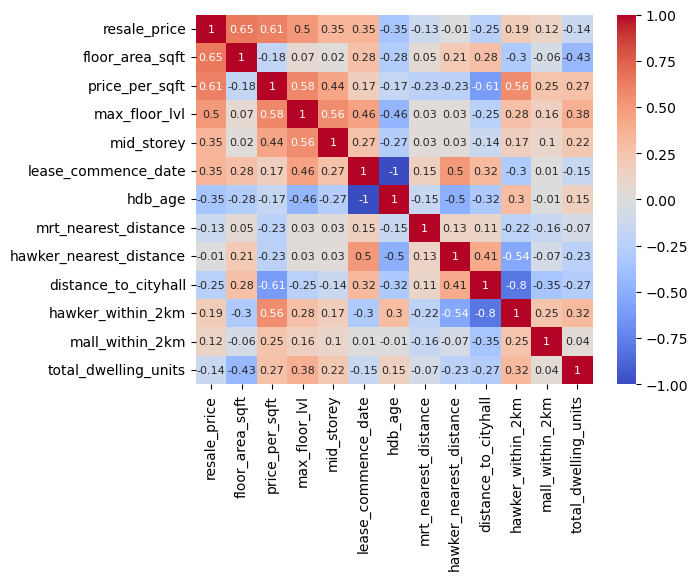

In [54]:
# Correlation heatmap of selected numerical features
sns.heatmap(round(selected_num_features.corr(),2), annot=True, annot_kws={"fontsize":8}, vmin=-1, vmax=1, cmap='coolwarm');

Plotted heatmap of correlation between numerical features selected above. Found that
1. max_floor_level and mid_storey are highly correlated. We may have to consider excluding mid_storey since it has lower correlation with price, to avoid adding noise and causing overfitting
2. max_floor_level has high correlation with lease_commence_date and hdb_age. One of these may have to be excluded to avoid adding noise and causing overfitting
3. hawker_nearest_distance has high correlation with lease_commence_date and hdb_age. One of these may have to be excluded to avoid adding noise and causing overfitting
4. distance_to_cityhall show high negative correlation with hawker_Within_2km and hawker_nearest_distance. The nearer to Cityhall, the less hawkers. One of these may have to be excluded to avoid adding noise and causing overfitting.
5. hawker_within_2km has high negative correlation with hawker_nearest_distance. We should only select one feature to avoid adding noise and causing overfitting
6. total_dwelling_units have high negative correlation with floor_area_sqft

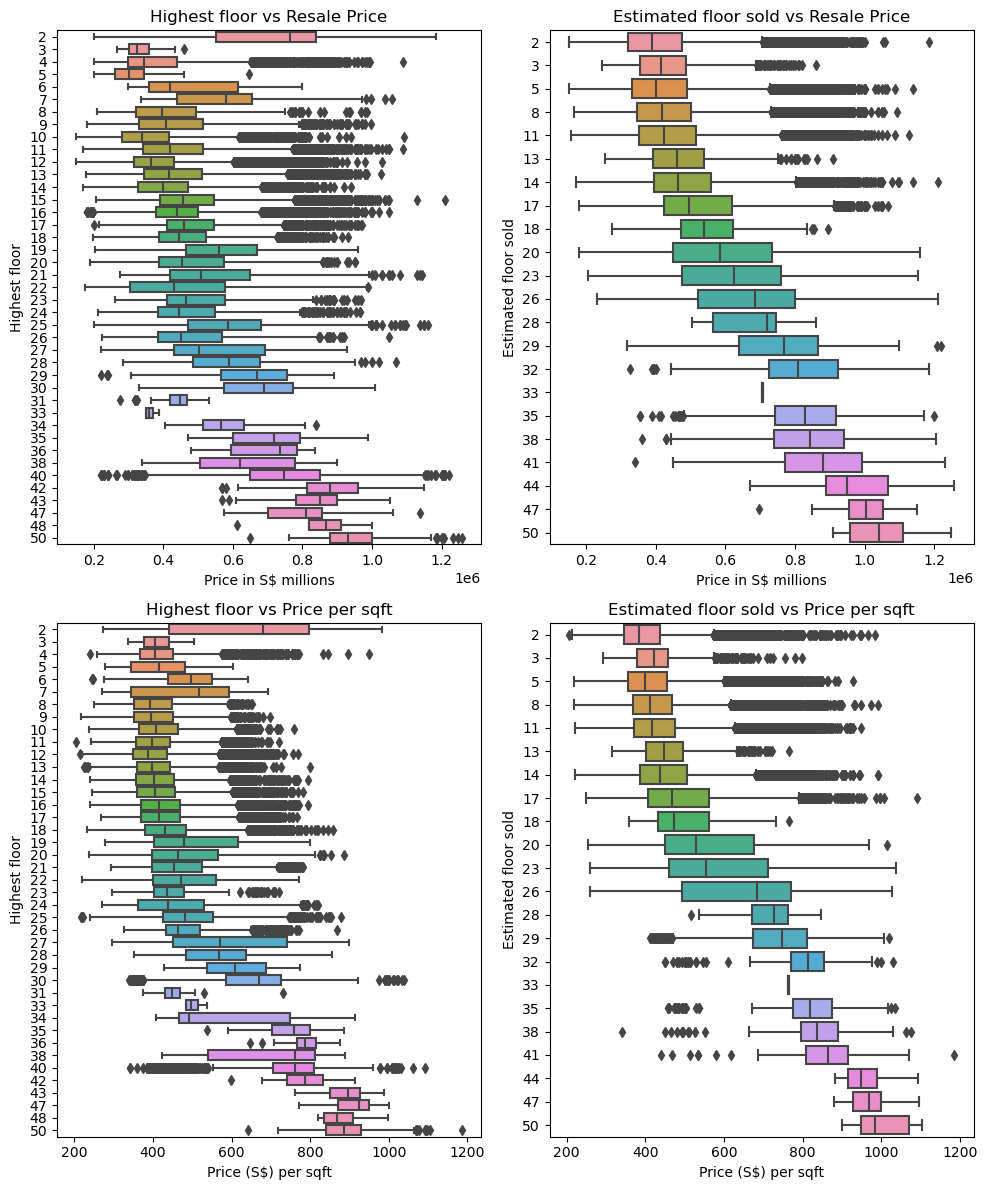

In [55]:
# Boxplot to view relationship between Floor and Price

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 12))

sns.boxplot(x='resale_price', y='max_floor_lvl', data=flats, orient = 'h', ax=axs[0,0])
ax=axs[0,0].set_xlabel('Price in S$ millions')
ax=axs[0,0].set_ylabel('Highest floor')
ax=axs[0,0].set_title('Highest floor vs Resale Price')

sns.boxplot(x='resale_price', y='mid_storey', data=flats, orient = 'h', ax=axs[0,1])
ax=axs[0,1].set_xlabel('Price in S$ millions')
ax=axs[0,1].set_ylabel('Estimated floor sold')
ax=axs[0,1].set_title('Estimated floor sold vs Resale Price')

sns.boxplot(x='price_per_sqft', y='max_floor_lvl', data=flats, orient = 'h', ax=axs[1,0])
ax=axs[1,0].set_xlabel('Price (S$) per sqft')
ax=axs[1,0].set_ylabel('Highest floor')
ax=axs[1,0].set_title('Highest floor vs Price per sqft')

sns.boxplot(x='price_per_sqft', y='mid_storey', data=flats, orient = 'h', ax=axs[1,1])
ax=axs[1,1].set_xlabel('Price (S$) per sqft')
ax=axs[1,1].set_ylabel('Estimated floor sold')
ax=axs[1,1].set_title('Estimated floor sold vs Price per sqft')

plt.tight_layout();

Boxplot of Floor vs Price: observed distinct positive linear relationship

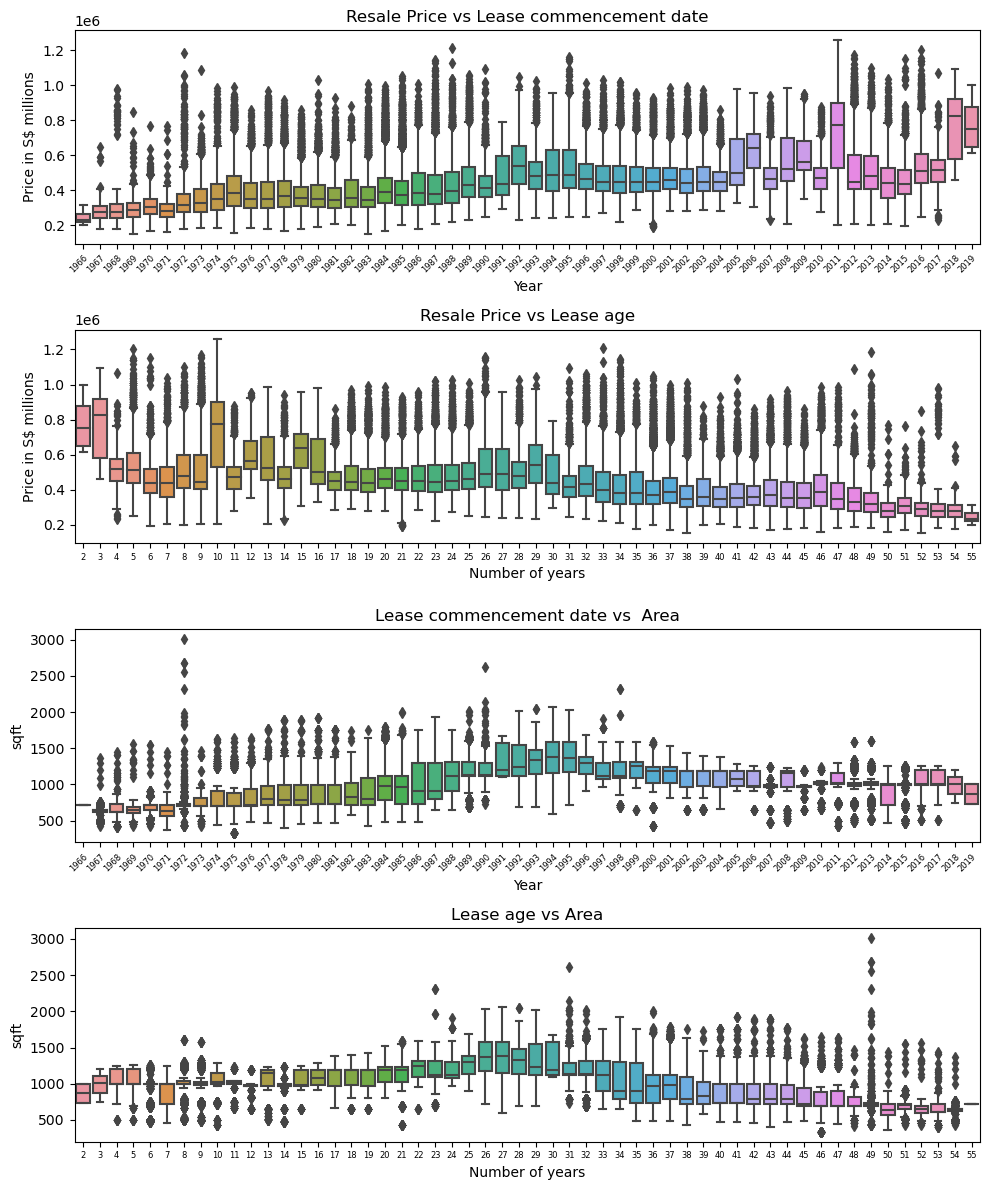

In [56]:
# Boxplot to view relationship between Lease and Price / Area

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

sns.boxplot(x='lease_commence_date', y='resale_price', data=flats, ax=axs[0])
ax=axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, fontsize=6, ha='right', wrap=True)
ax=axs[0].set_xlabel('Year')
ax=axs[0].set_ylabel('Price in S$ millions')
ax=axs[0].set_title('Resale Price vs Lease commencement date')

sns.boxplot(x='hdb_age', y='resale_price', data=flats, ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=6)
ax=axs[1].set_xlabel('Number of years')
ax=axs[1].set_ylabel('Price in S$ millions')
ax=axs[1].set_title('Resale Price vs Lease age')

sns.boxplot(x='lease_commence_date', y='floor_area_sqft', data=flats, ax=axs[2])
ax=axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, fontsize=6, ha='right', wrap=True)
ax=axs[2].set_xlabel('Year')
ax=axs[2].set_ylabel('sqft')
ax=axs[2].set_title('Lease commencement date vs  Area')

sns.boxplot(x='hdb_age', y='floor_area_sqft', data=flats, ax=axs[3])
axs[3].set_xticklabels(axs[3].get_xticklabels(), fontsize=6)
ax=axs[3].set_xlabel('Number of years')
ax=axs[3].set_ylabel('sqft')
ax=axs[3].set_title('Lease age vs Area')

plt.tight_layout();

Boxplot of Lease vs Price: observed distinct linear relationship <br>
Boxplot of Lease vs Age: observed no clear linear relationship. Flats may have been built bigger over the the years initially, then built smaller over the years from the mid 1990s. As this should not impact the model too significantly, no issues here.

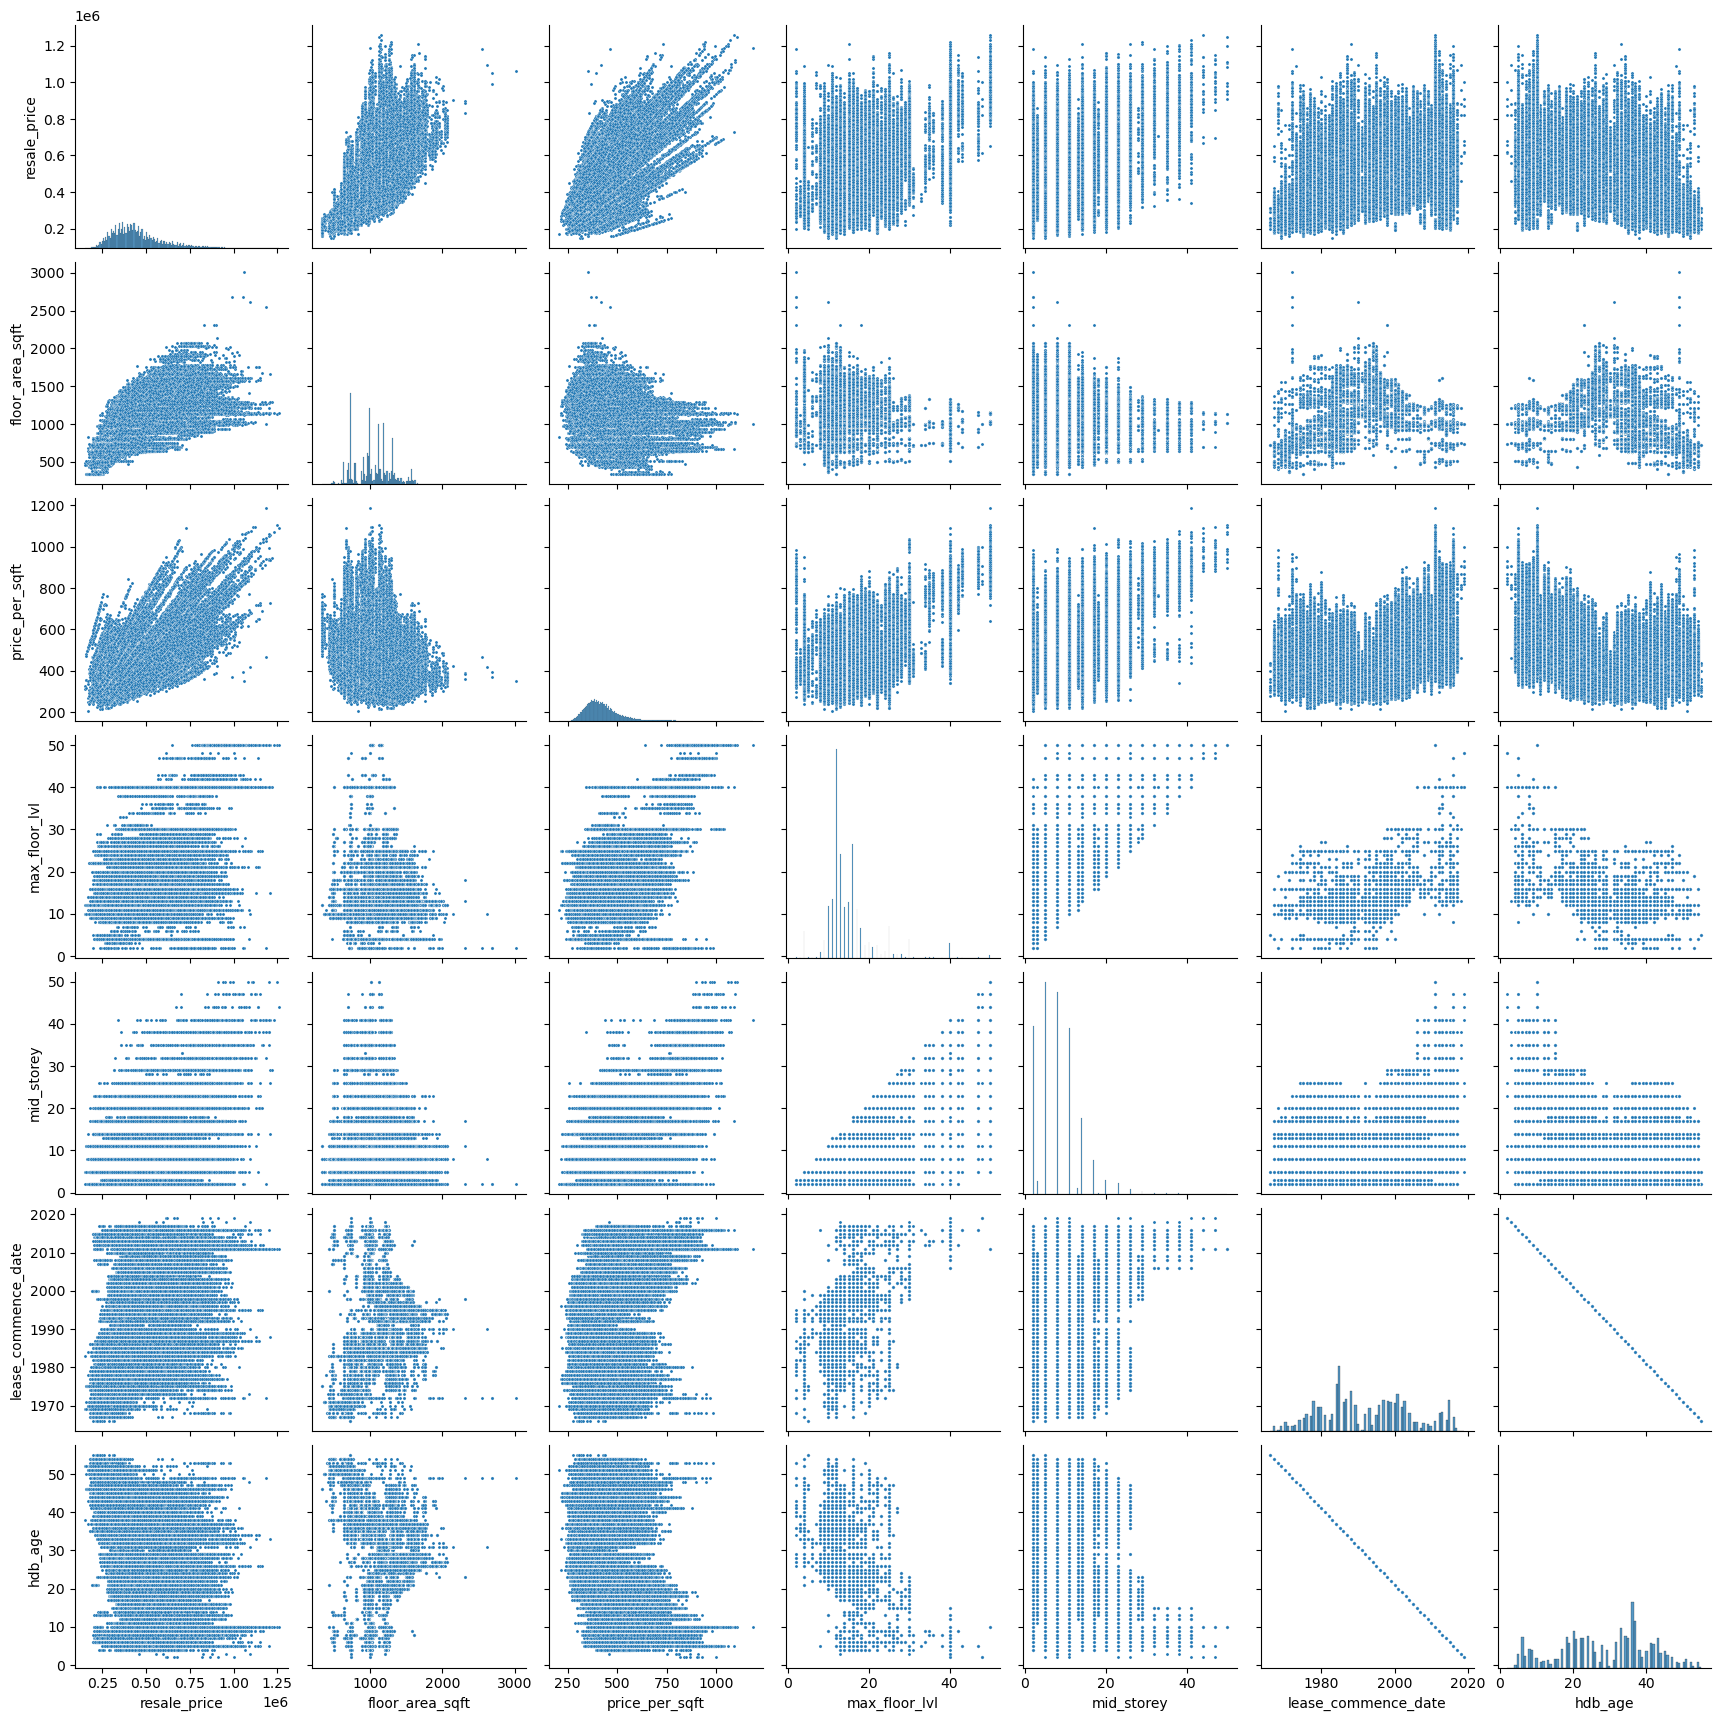

In [57]:
sns.pairplot(flats[['resale_price','floor_area_sqft','price_per_sqft',
                    'max_floor_lvl','mid_storey',
                    'lease_commence_date', 'hdb_age',
                   ]],
            plot_kws={'s': 5});

Scatterplot of resale price against floor area: strong correlation seen as expected. <br>
Scatterplot of resale price against price per sqft: strong correlation seen as expected.

Scatterplot of floor and age related features against price and area: relationship not so obvious from this graphs, so will refer back to boxplots instead.

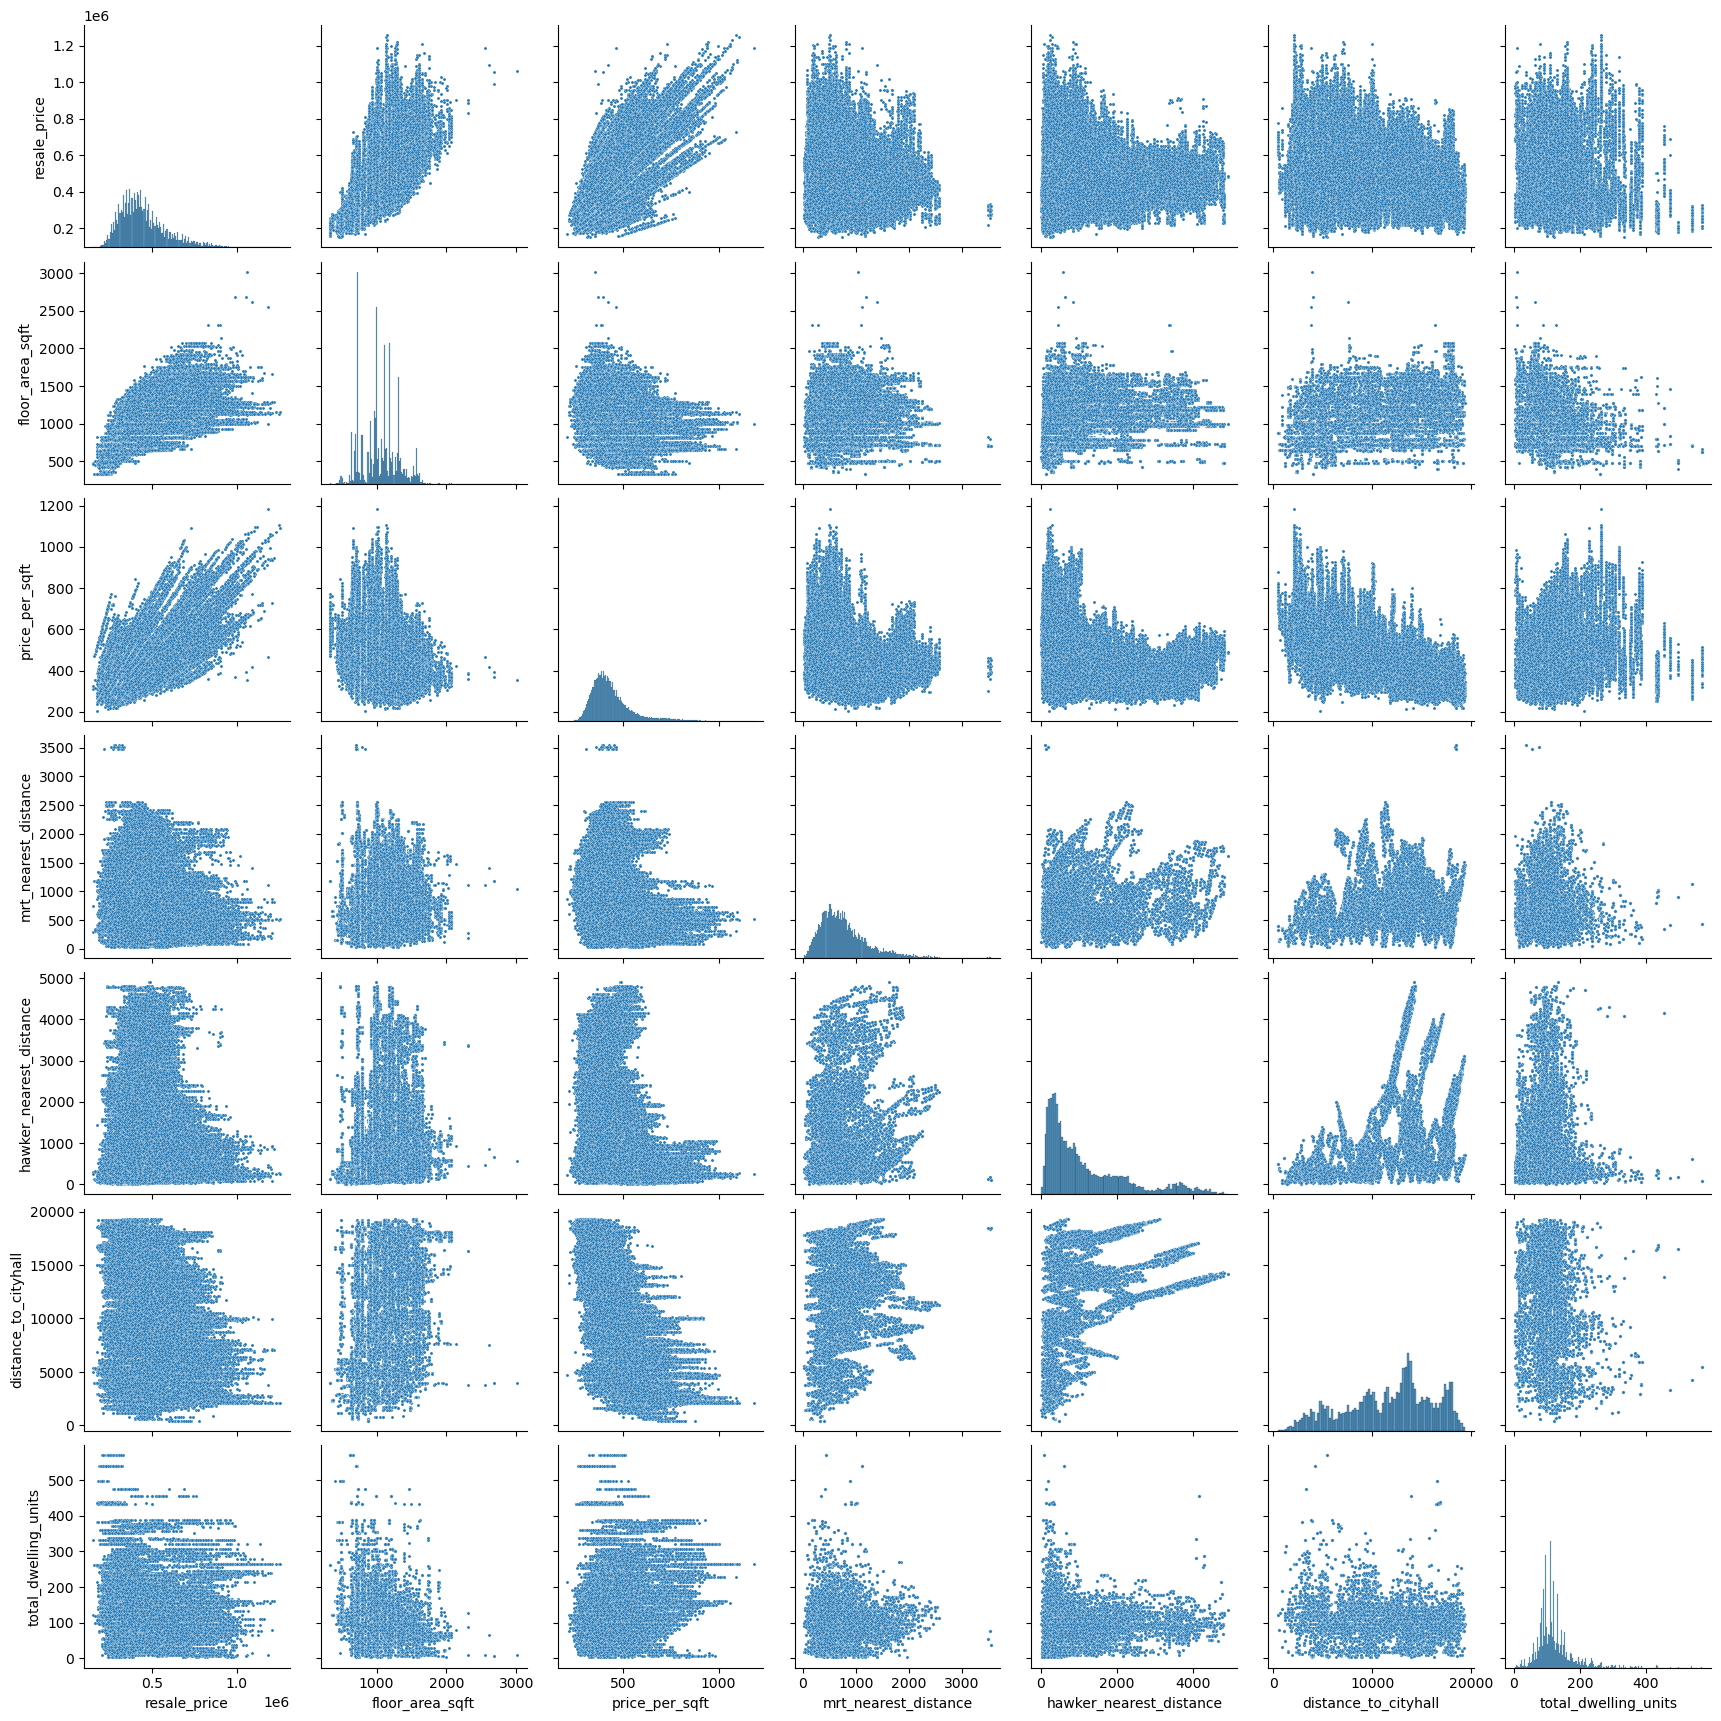

In [58]:
sns.pairplot(flats[['resale_price','floor_area_sqft','price_per_sqft',
                    'mrt_nearest_distance', 'hawker_nearest_distance','distance_to_cityhall',
                    'total_dwelling_units'
                   ]], 
            plot_kws={'s': 5});

Scatterplot of distance to MRT, hawker and CityHall related features against price and area: clear relationship with resale price and price per area (more with higher prices when distance is less); no clear relationship with area.

Scatterplot of total dwelling units against price and area: noticable relationship with resale price (higher price as number of dwelling units decrease, possibly due to better environment for less dense units with less noise). Seem more correlated to area rather than price per area -- the more the space of each unit, the less number of dwelling units there could be. There could be some overlap in characteristics with price per sqft.

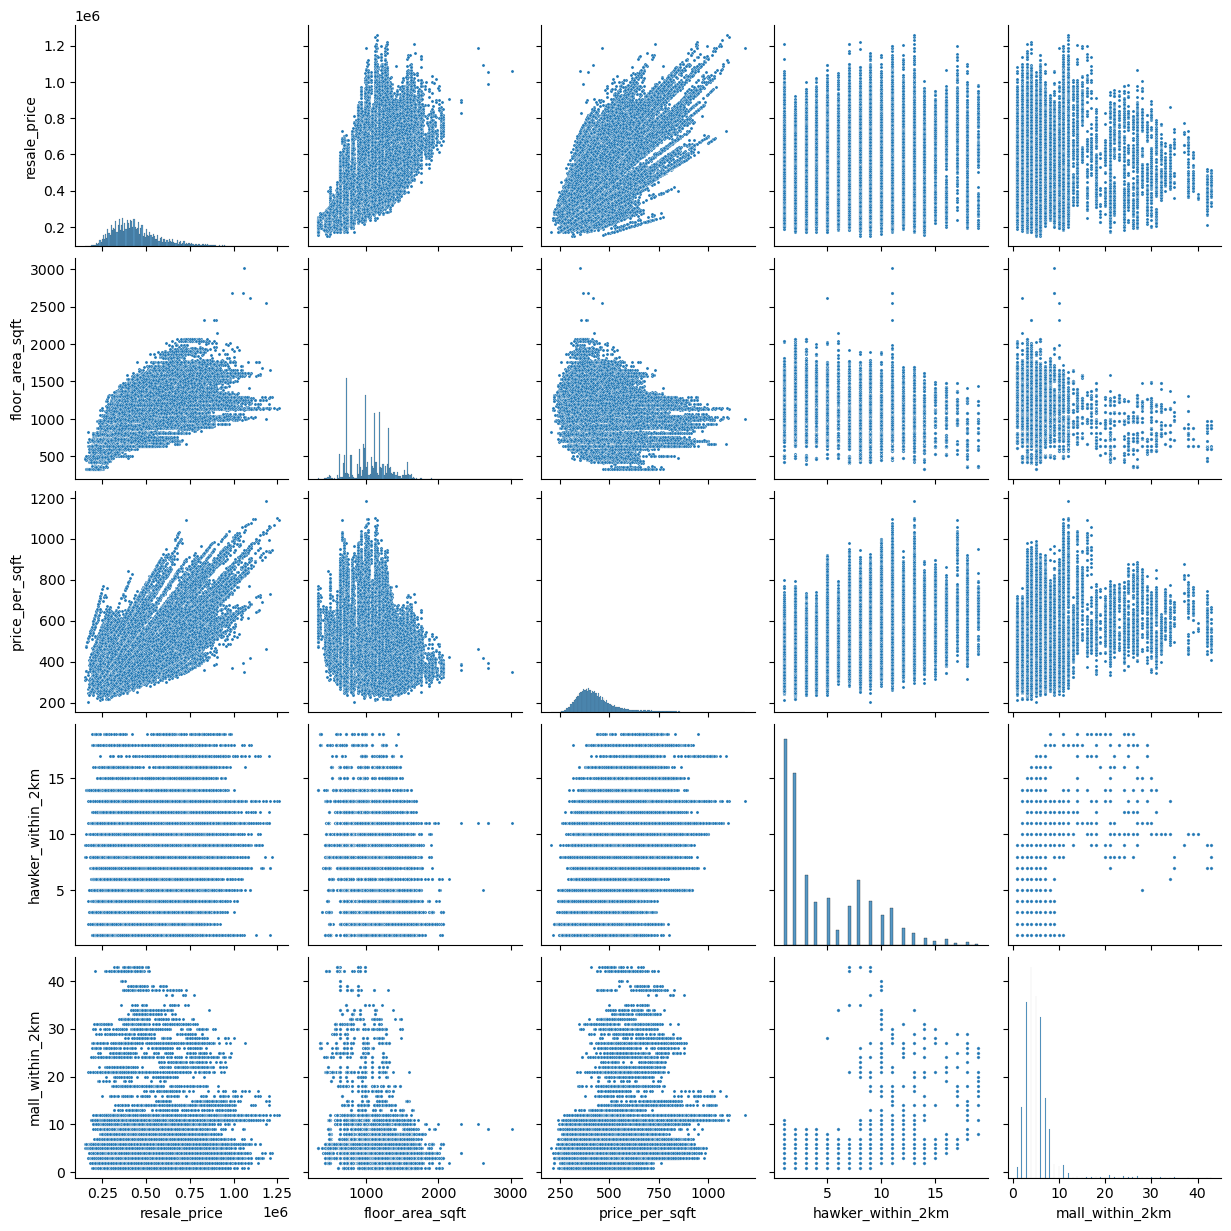

In [59]:
sns.pairplot(flats[['resale_price','floor_area_sqft','price_per_sqft',
                   'hawker_within_2km','mall_within_2km',
                   ]], 
            plot_kws={'s': 5});

Scatterplot of number of hawker and malls price and area: relationship not so obvious from this graphs. For malls within 2km, expect price to be higher when there are more malls, but graph shows otherwise.

Will continue to test if this features have significance to the models, but will not have expectations that it would.

### Categorical features

**Location related (Town, Planning Area, Postal Sector)**

In [60]:
flats['town'].value_counts()

JURONG WEST        11451
WOODLANDS          11334
SENGKANG           11069
TAMPINES           10506
YISHUN             10042
BEDOK               9046
PUNGGOL             7793
HOUGANG             7555
ANG MO KIO          6908
CHOA CHU KANG       6343
BUKIT MERAH         5854
BUKIT PANJANG       5686
BUKIT BATOK         5623
TOA PAYOH           4817
PASIR RIS           4763
KALLANG/WHAMPOA     4340
QUEENSTOWN          4121
GEYLANG             3986
SEMBAWANG           3723
CLEMENTI            3633
JURONG EAST         3470
SERANGOON           3123
BISHAN              2871
CENTRAL AREA        1249
MARINE PARADE        959
BUKIT TIMAH          369
Name: town, dtype: int64

In [61]:
flats['planning_area'].value_counts()

Jurong West                11451
Woodlands                  11334
Sengkang                   11069
Tampines                   10506
Yishun                     10042
Bedok                       9062
Punggol                     7793
Hougang                     7557
Ang Mo Kio                  6908
Choa Chu Kang               6328
Bukit Merah                 5854
Bukit Batok                 5700
Bukit Panjang               5686
Toa Payoh                   4817
Pasir Ris                   4725
Queenstown                  4103
Geylang                     3986
Sembawang                   3723
Clementi                    3633
Jurong East                 3470
Kallang                     3163
Serangoon                   3121
Bishan                      2871
Novena                      1091
Marine Parade                943
Outram                       759
Rochor                       468
Bukit Timah                  362
Changi                        38
Downtown Core                 31
Tanglin   

In [62]:
cat = ['town', 'planning_area', 'postal_sector']
for c in cat:
    print(f'{c}: {flats[c].nunique()} unique items')

town: 26 unique items
planning_area: 32 unique items
postal_sector: 52 unique items


Location related: <br>
Although similar, there are 6 more items in planning area compared to town. Will use planning area because the description is more intuitive and sepecific (e.g. Outram vs Central Area).

Will also keep postal sector to test alternative models, to see if housing prices are more related to planning area or postal sector.

**Flat types and models**

In [63]:
cat = ['flat_type', 'flat_model']
for c in cat:
    print(f'{c}: {flats[c].nunique()} unique items')

flat_type: 7 unique items
flat_model: 20 unique items


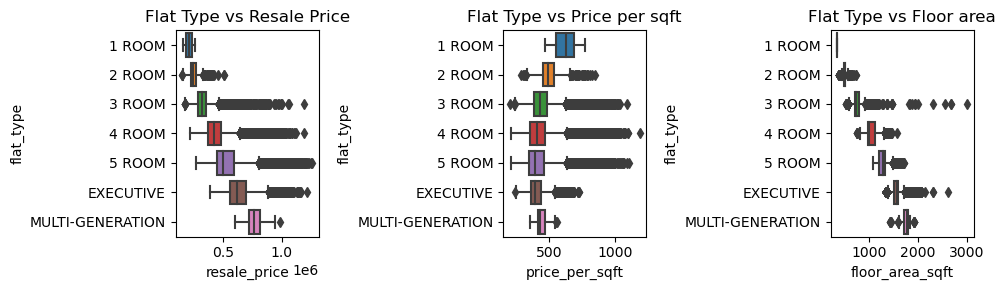

In [64]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

sns.boxplot(x='resale_price', y='flat_type', data=flats, orient='h', order=sorted(flats['flat_type'].unique()), ax=axs[0])
ax=axs[0].set_title('Flat Type vs Resale Price')

sns.boxplot(x='price_per_sqft', y='flat_type', data=flats, orient='h', order=sorted(flats['flat_type'].unique()), ax=axs[1])
ax=axs[1].set_title('Flat Type vs Price per sqft')

sns.boxplot(x='floor_area_sqft', y='flat_type', data=flats, orient='h', order=sorted(flats['flat_type'].unique()), ax=axs[2])
axs[2].set_title('Flat Type vs Floor area')

plt.tight_layout();

In [65]:
flats['flat_type'].value_counts()

4 ROOM              61136
3 ROOM              39060
5 ROOM              36415
EXECUTIVE           11989
2 ROOM               1896
1 ROOM                 82
MULTI-GENERATION       56
Name: flat_type, dtype: int64

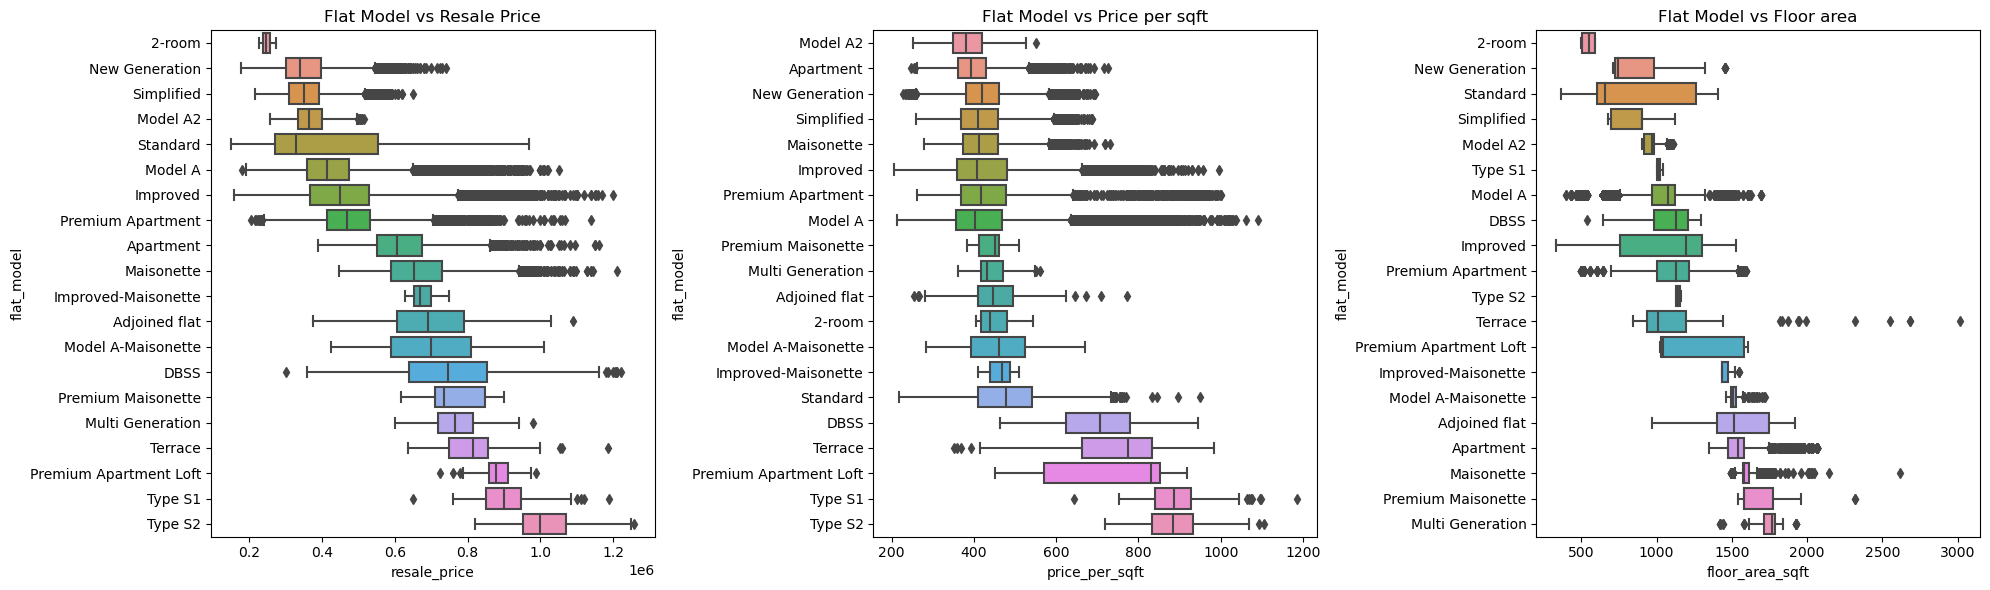

In [66]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

order_flat_model_0 = flats.groupby('flat_model')['resale_price'].mean().sort_values().index
sns.boxplot(x='resale_price', y='flat_model', data=flats, orient='h', order=order_flat_model_0, ax=axs[0])
ax=axs[0].set_title('Flat Model vs Resale Price')

order_flat_model_1 = flats.groupby('flat_model')['price_per_sqft'].mean().sort_values().index
sns.boxplot(x='price_per_sqft', y='flat_model', data=flats, orient='h', order=order_flat_model_1, ax=axs[1])
ax=axs[1].set_title('Flat Model vs Price per sqft')

order_flat_model_2 = flats.groupby('flat_model')['floor_area_sqft'].mean().sort_values().index
sns.boxplot(x='floor_area_sqft', y='flat_model', data=flats, orient='h', order=order_flat_model_2, ax=axs[2])
axs[2].set_title('Flat Model vs Floor area')

plt.tight_layout();

In [67]:
flats['flat_model'].value_counts()

Model A                   46261
Improved                  38514
New Generation            23366
Premium Apartment         15091
Simplified                 7239
Apartment                  6080
Standard                   4867
Maisonette                 4364
Model A2                   2064
DBSS                       1658
Model A-Maisonette          262
Adjoined flat               260
Type S1                     242
Type S2                     127
Terrace                      95
Multi Generation             56
Premium Apartment Loft       50
Improved-Maisonette          19
Premium Maisonette           15
2-room                        4
Name: flat_model, dtype: int64

Flat types:
Noted different flat types are affected more by area size rather than price per unit area. However from boxplot, noted that price per sqft is higher for 1 and 2 room flats. Price per unit area for these smaller units although overall resale price is still less due to its size. However, number of sold units for 1 and 2 room flats are too few to isolate these as a feature. <br>
Surprisingly, more premium or rarer Executive or Multi-Generation flat types do not cost more per unit area. We'll see if this is the case when modelling. <br><br>


Flat models:
Identified from boxplot that there are 5 flat models which most affect price per unit area:
- DBSS
- Terrace
- Premium Apartment Loft
- Type S1
- Type S2

These have mean of more than SGD 700 per sqft, while the other flat models are all below SGD 500 per sqft. However, number of units sold for these is too few too specially isolate these as a feature. <br>
Noted that different types of flat models have different sizes, although size should already be covered under *floor_area_sqft*.

**Convenience related (school affiliation, interchanges)**

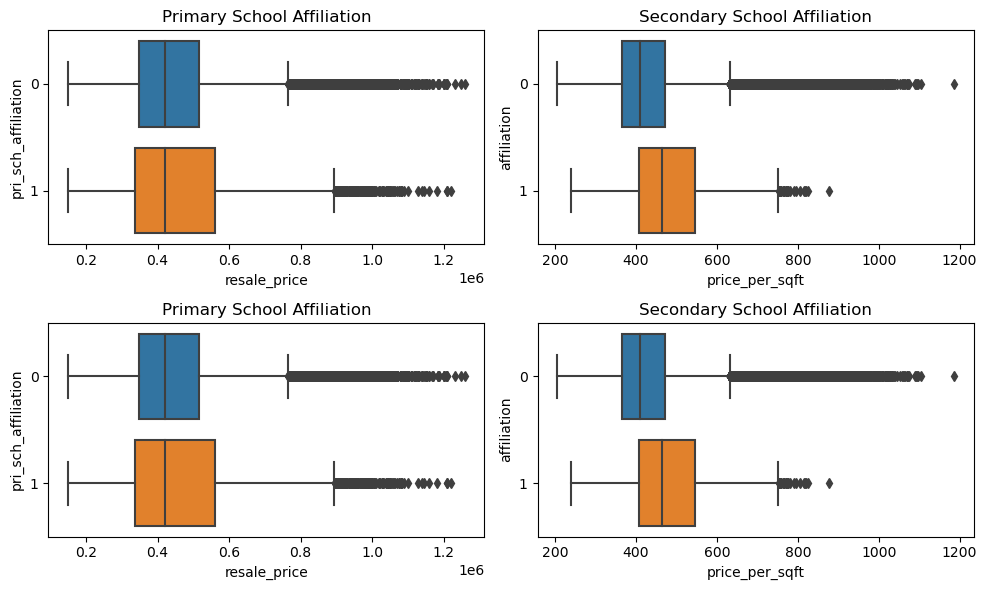

In [68]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

sns.boxplot(x='resale_price', y='pri_sch_affiliation', data=flats, orient='h', ax=axs[0,0])
ax=axs[0,0].set_title('Primary School Affiliation')

sns.boxplot(x='price_per_sqft', y='affiliation', data=flats, orient='h', ax=axs[0,1])
ax=axs[0,1].set_title('Secondary School Affiliation')

sns.boxplot(x='resale_price', y='pri_sch_affiliation', data=flats, orient='h', ax=axs[1,0])
ax=axs[1,0].set_title('Primary School Affiliation')

sns.boxplot(x='price_per_sqft', y='affiliation', data=flats, orient='h', ax=axs[1,1])
ax=axs[1,1].set_title('Secondary School Affiliation')

plt.tight_layout();

In [69]:
columns = ['pri_sch_affiliation', 'affiliation']
pd.concat([round(flats[col].value_counts(normalize=True), 4) for col in columns], axis=1)

pri_sch_affiliation  affiliation
0               0.8868       0.9681
1               0.1132       0.0319

School affiliation: Observed from boxplot that mean of resale price was not higher due to school affiliation. To drop such features.

In [70]:
columns = ['mrt_interchange', 'bus_interchange']
pd.concat([round(flats[col].value_counts(normalize=True), 4) for col in columns], axis=1)

mrt_interchange  bus_interchange
0            0.736           0.4536
1            0.264           0.5464

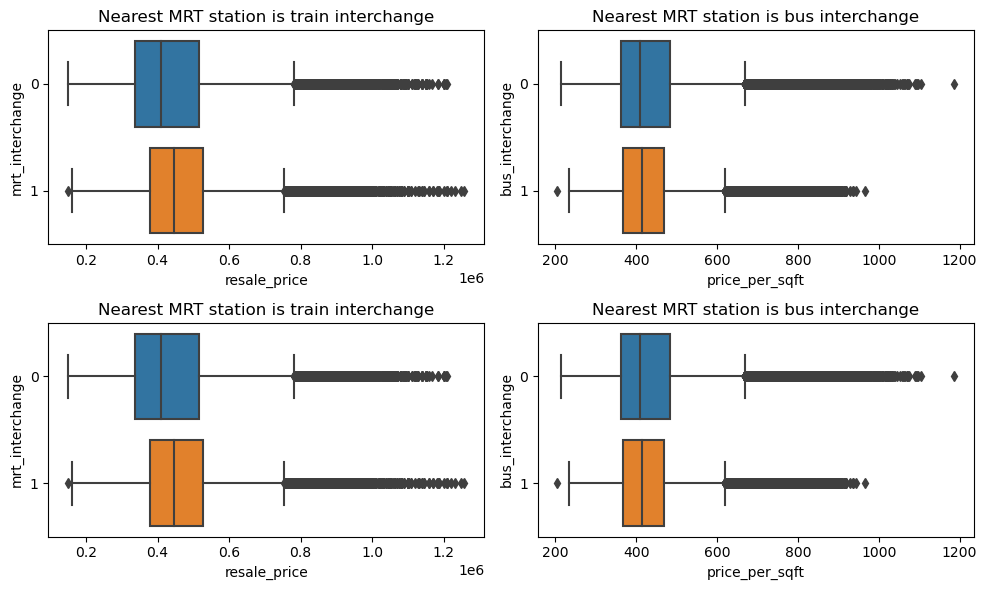

In [71]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

sns.boxplot(x='resale_price', y='mrt_interchange', data=flats, orient='h', ax=axs[0,0])
ax=axs[0,0].set_title('Nearest MRT station is train interchange')

sns.boxplot(x='price_per_sqft', y='bus_interchange', data=flats, orient='h', ax=axs[0,1])
ax=axs[0,1].set_title('Nearest MRT station is bus interchange');

sns.boxplot(x='resale_price', y='mrt_interchange', data=flats, orient='h', ax=axs[1,0])
ax=axs[1,0].set_title('Nearest MRT station is train interchange')

sns.boxplot(x='price_per_sqft', y='bus_interchange', data=flats, orient='h', ax=axs[1,1])
ax=axs[1,1].set_title('Nearest MRT station is bus interchange')

plt.tight_layout();

Interchanges: Observed slightly higher average resale price (in S$ millions) for MRT stations that are train or bus interchanges. Can explore further if these should be part of model.

**Other features**

In [72]:
columns = ['commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion']
pd.concat([round(flats[col].value_counts(normalize=True), 4) for col in columns], axis=1)

commercial  market_hawker  multistorey_carpark  precinct_pavilion
N      0.8087         0.9999               0.9997             0.9991
Y      0.1913         0.0001               0.0003             0.0009

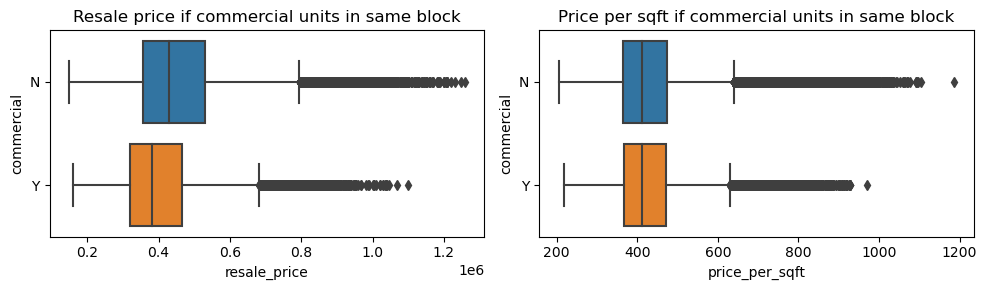

In [73]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

sns.boxplot(x='resale_price', y='commercial', data=flats, orient='h', ax=axs[0])
axs[0].set_title('Resale price if commercial units in same block')

sns.boxplot(x='price_per_sqft', y='commercial', data=flats, orient='h', ax=axs[1])
axs[1].set_title('Price per sqft if commercial units in same block');

plt.tight_layout();

Too few flats sold with market/hawker, multistorey carpark or precinct pavillion in same block. <br>

Observed slightly lower average resale price (in S$ millions) for flats with commercial units in the same block. <br>
Noted however that this does not affect price per sqft, so could be a noise rather than useful feature. <br>
For now, can explore further if these should be part of model.

In [74]:
cat = ['street_name','address','mrt_name','pri_sch_name','sec_sch_name']
for c in cat:
    print(f'{c}: {flats[c].nunique()} unique items')

street_name: 553 unique items
address: 9157 unique items
mrt_name: 94 unique items
pri_sch_name: 177 unique items
sec_sch_name: 134 unique items


Too many mrt and school names to be useful as features. To drop. <br>
To keep street name and address for reference only.

--- 
## Data Cleaning Round Two
---

**Cleaning for train dataset**

In [75]:
second_list_to_drop = [
    'tranc_yearmonth', 'tranc_year', 'tranc_month', # low correlation
    'lease_commence_date', # to look at hdb age instead, 100% negative correlation
    '1room_rental', '2room_rental', '3room_rental', 'other_room_rental', # low correlation
    'town', 'postal', # use planning_area, postal_sector instead
    'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', # to look at Mall_within_2km with highest correlation
    'hawker_within_500m', 'hawker_within_1km', # to look at Hawker_within_2km with highest correlation
    'bus_stop_nearest_distance', # low correlation
    'pri_sch_nearest_distance', 'sec_sch_nearest_dist', 'vacancy', 'cutoff_point', # low correlation
    'pri_sch_affiliation', 'affiliation', # no significant differences
    'market_hawker', 'multistorey_carpark', 'precinct_pavilion',  # not enough distinction in feature
    'mrt_name','pri_sch_name','sec_sch_name', # too many to be useful
    'hawker_within_2km', 'mall_within_2km', # use imputed columns
    'house_coord' # temp column
    ]

flats.drop(second_list_to_drop, axis=1, inplace=True)

In [76]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   flat_type                150634 non-null  object 
 1   street_name              150634 non-null  object 
 2   flat_model               150634 non-null  object 
 3   resale_price             150634 non-null  float64
 4   mid_storey               150634 non-null  int64  
 5   address                  150634 non-null  object 
 6   floor_area_sqft          150634 non-null  float64
 7   price_per_sqft           150634 non-null  float64
 8   hdb_age                  150634 non-null  int64  
 9   max_floor_lvl            150634 non-null  int64  
 10  commercial               150634 non-null  object 
 11  total_dwelling_units     150634 non-null  int64  
 12  latitude                 150634 non-null  float64
 13  longitude                150634 non-null  float64
 14  plan

In [77]:
flats['commercial'].replace('N', 0, inplace=True)
flats['commercial'].replace('Y', 1, inplace=True)

In [78]:
# Reorder the columns
new_order = ['resale_price', 'floor_area_sqft', 'price_per_sqft', # key criteria
             'street_name', 'address', 'latitude', 'longitude', # for reference only
             'flat_type', 'flat_model', # flat type and model; to one hot
             'planning_area', 'postal_sector', # location related; to one hot
             'max_floor_lvl', 'mid_storey', # flat height and level
             'hdb_age', # lease age
             'mrt_interchange', 'bus_interchange', # convenience related
             'mrt_nearest_distance', 'hawker_nearest_distance', 'distance_to_cityhall', # convenience related
             'hawker_within_2km_imp', 'mall_within_2km_imp',  # convenience related
             'total_dwelling_units', 'commercial', # others
            ]
             
flats = flats[new_order]

In [79]:
# Check order and again for data types
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   resale_price             150634 non-null  float64
 1   floor_area_sqft          150634 non-null  float64
 2   price_per_sqft           150634 non-null  float64
 3   street_name              150634 non-null  object 
 4   address                  150634 non-null  object 
 5   latitude                 150634 non-null  float64
 6   longitude                150634 non-null  float64
 7   flat_type                150634 non-null  object 
 8   flat_model               150634 non-null  object 
 9   planning_area            150634 non-null  object 
 10  postal_sector            150634 non-null  object 
 11  max_floor_lvl            150634 non-null  int64  
 12  mid_storey               150634 non-null  int64  
 13  hdb_age                  150634 non-null  int64  
 14  mrt_

In [80]:
# Check again for null values
flats.isnull().sum().sort_values(ascending=False)

resale_price               0
mid_storey                 0
total_dwelling_units       0
mall_within_2km_imp        0
hawker_within_2km_imp      0
distance_to_cityhall       0
hawker_nearest_distance    0
mrt_nearest_distance       0
bus_interchange            0
mrt_interchange            0
hdb_age                    0
max_floor_lvl              0
floor_area_sqft            0
postal_sector              0
planning_area              0
flat_model                 0
flat_type                  0
longitude                  0
latitude                   0
address                    0
street_name                0
price_per_sqft             0
commercial                 0
dtype: int64

In [81]:
# Basic Target Encoding using price per square feet

cat_cols = ['flat_type', 'flat_model', 'planning_area', 'postal_sector']
for col in cat_cols:     
    means = flats.groupby(col)['price_per_sqft'].mean() # Calculate the target value for each category
    flats[f"{col}_tgt"] = flats[col].map(means)

In [82]:
# Save cleaned data to cleaned folder
flats.to_csv('datasets/flats_cleaned.csv', index=False)

**Cleaning for test dataset**

In [83]:
flats_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16737 non-null  int64  
 1   Tranc_YearMonth            16737 non-null  object 
 2   town                       16737 non-null  object 
 3   flat_type                  16737 non-null  object 
 4   block                      16737 non-null  object 
 5   street_name                16737 non-null  object 
 6   storey_range               16737 non-null  object 
 7   floor_area_sqm             16737 non-null  float64
 8   flat_model                 16737 non-null  object 
 9   lease_commence_date        16737 non-null  int64  
 10  Tranc_Year                 16737 non-null  int64  
 11  Tranc_Month                16737 non-null  int64  
 12  mid_storey                 16737 non-null  int64  
 13  lower                      16737 non-null  int

In [84]:
# Lowercase for column headers for consistency
flats_test.columns = flats_test.columns.str.lower()

In [85]:
# Check what is causing postal to be a string instead of integer datatype.

non_numerical_values = []

for val in flats_test['postal']:
    try:
        float(val)
    except ValueError:
        if val not in non_numerical_values:
            non_numerical_values.append(val) # if value is non-numerical and not already identified, it will be added to list

if len(non_numerical_values) > 0:
    print(f'Non-numerical value: {non_numerical_values}')
else:
    print(f'No non-numerical values in {col}')

Non-numerical value: ['NIL']


In [86]:
flats_test['postal'].replace('NIL',999999,inplace=True) # temporarily replace NIL with 99999
flats_test['postal_sector'] = flats_test['postal'].apply(lambda x: int(str(x)[-6:-4])) # take only first 1st 2 of 6 digit postal (or 1st of 5 digit)
flats_test['postal_sector']

0        76
1        64
2        56
3        73
4        65
         ..
16732    56
16733    82
16734    68
16735    57
16736    61
Name: postal_sector, Length: 16737, dtype: int64

In [87]:
flats_test[flats_test['postal_sector']==99].groupby('town').size()

town
SENGKANG    2
dtype: int64

In [88]:
# Replaced all postal_sector 99 for Choa Chu Kang and Sengkang
flats_test.loc[(flats_test['town'] == 'SENGKANG') & (flats_test['postal_sector'] == 99), 'postal_sector'] = 54

In [89]:
# Calculate geodistance to cityhall

city_hall = (1.2931576, 103.852073)
flats_test['house_coord'] = tuple(zip(flats_test.latitude, flats_test.longitude))
flats_test['distance_to_cityhall'] = flats_test['house_coord'].map(lambda hse: haversine(hse, city_hall, unit='m'))

In [90]:
# Impute mean from train for missing values in test dataset (Mall 2km)
flats_test['mall_within_2km_imp'] = flats_test['mall_within_2km'].fillna(mean_mall_within_2km)

In [91]:
# Impute KNN from train for missing values in test dataset (Hawker 2km)
flats_test['hawker_within_2km_imp'] = imputer.transform(flats_test[['longitude', 'latitude', 'hawker_within_2km']])[:, -1]

In [92]:
# Reformat boolean
flats_test['commercial'].replace('N', 0, inplace=True)
flats_test['commercial'].replace('Y', 1, inplace=True)

In [93]:
# Basic Target Encoding using price per sqft
cat_cols = ['flat_type', 'flat_model', 'planning_area', 'postal_sector']
for col in cat_cols:     
    means = flats.groupby(col)['price_per_sqft'].mean() # Calculate the target value for each category
    flats_test[f"{col}_tgt"] = flats[col].map(means)

In [94]:
# Reorder the columns and only select these
test_order = [
             'id',
             'floor_area_sqft', 'price_per_sqft', # key criteria
             'street_name', 'address', 'latitude', 'longitude', # for reference only
             'flat_type', 'flat_model', # flat type and model; to one hot
             'planning_area', 'postal_sector', # location related; to one hot
             'max_floor_lvl', 'mid_storey', # flat height and level
             'hdb_age', # lease age
             'mrt_interchange', 'bus_interchange',  # convenience related
             'mrt_nearest_distance', 'hawker_nearest_distance', 'distance_to_cityhall', # convenience related
             'hawker_within_2km_imp', 'mall_within_2km_imp',  # convenience related
             'total_dwelling_units', 'commercial', # others
             'flat_type_tgt', 'flat_model_tgt', 'planning_area_tgt', 'postal_sector_tgt', # target encoding
            ]
             
flats_test = flats_test[test_order]        

In [95]:
# Save cleaned data to cleaned folder
flats_test.to_csv('datasets/flats_test_cleaned.csv', index=False)

---
## Summary for Part 1
---

Based on analysis of correlation of features with resale price / area / price per unit area, as well as analysis of boxplot and scatterplots relationships, we selected features for prediction modelling as done in Part 2.

Features select relate to:
- size (price_per_sqft)
- age (hdb age)
- flat types ('flat_type', 'flat_model')
- location ('planning_area', 'postal_sector')
- flat height ('max_floor_lvl', 'mid_storey')
- convenience ('mrt_interchange', 'bus_interchange', 'mrt_nearest_distance', 'hawker_nearest_distance', 'distance_to_cityhall', 'hawker_within_2km_imp', 'mall_within_2km_imp')
- others ('total_dwelling_units', 'commercial')

School related features (e.g. distance, affiliation, cut-off points) do not seem to affect housing prices.

We have also prepared target encoding using average price per square feet of each category for some features ('flat_type', 'flat_model', 'planning_area', 'postal_sector') to see if this would work better for the models.